In [9]:
import pandas as pd
import os

<AxesSubplot:>

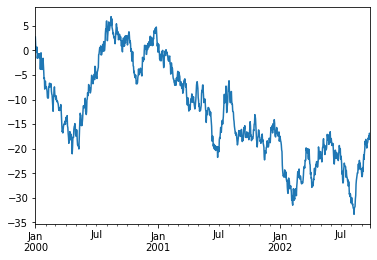

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

### 拆分行
https://zhuanlan.zhihu.com/p/28337202

In [31]:
df = pd.DataFrame({'Country':['China','US','Japan','EU','UK/Australia', 'UK/Netherland'],
               'Number':[100, 150, 120, 90, 30, 2],
               'Value': [1, 2, 3, 4, 5, 6],
               'label': list('abcdef')})
df

,Country,Number,Value,label
0,China,100,1,a
1,US,150,2,b
2,Japan,120,3,c
3,EU,90,4,d
4,UK/Australia,30,5,e
5,UK/Netherland,2,6,f


In [34]:
df.drop('Country', axis=1).join(df['Country'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).rename('Country'))

,Number,Value,label,Country
0,100,1,a,China
1,150,2,b,US
2,120,3,c,Japan
3,90,4,d,EU
4,30,5,e,UK
4,30,5,e,Australia
5,2,6,f,UK
5,2,6,f,Netherland


### 分列

In [22]:
data = pd.DataFrame({'Country':['China/Japan','US/EU','Japan/Korea','EU/France','UK/Australia', 'UK/Netherland'],
               'Number':[100, 150, 120, 90, 30, 2],
               'Value': [1, 2, 3, 4, 5, 6],
               'label': list('abcdef')})
data

,Country,Number,Value,label
0,China/Japan,100,1,a
1,US/EU,150,2,b
2,Japan/Korea,120,3,c
3,EU/France,90,4,d
4,UK/Australia,30,5,e
5,UK/Netherland,2,6,f


In [26]:
results = data['Country'].str.split(os.sep,expand=True)
results

,0,1
0,China,Japan
1,US,EU
2,Japan,Korea
3,EU,France
4,UK,Australia
5,UK,Netherland


In [27]:
data["team1"] = results[0]
data

,Country,Number,Value,label,team1
0,China/Japan,100,1,a,China
1,US/EU,150,2,b,US
2,Japan/Korea,120,3,c,Japan
3,EU/France,90,4,d,EU
4,UK/Australia,30,5,e,UK
5,UK/Netherland,2,6,f,UK
